In [ ]:
import pandas as pd
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

URL = '/content/export (20).csv'

df = pd.read_csv(URL)
df = df.drop(columns=['cod_produto'])
display(df.head())


,cod_provedor,cod_categoria,dsc_produto,cod_corrida,dat_criacao,cod_companhia,num_preco,dat_atualizacao,dsc_carro,num_latitude_origem,num_longitude_origem,num_latitude_destino,num_longitude_destino,num_distancia_m,num_tempo_estimado_seg
0,5,2,MULHER,1183208,2021-08-17 10:10:50.9502919,40,59.69,2021-08-17 10:11:09.4156738,NaN,-19.849539,-44.019929,-19.936899,-43.9401603,16564.3,1505.8
1,5,2,MULHER,1183236,2021-08-17 10:16:33.1757798,40,8.50,2021-08-17 10:16:46.1789220,NaN,-23.217134,-46.866711,-23.2078352,-46.8592323,2415.9,211.2
2,5,2,MULHER,1183241,2021-08-17 10:17:20.9350402,40,35.50,2021-08-17 10:17:35.4966101,NaN,-25.552240,-49.244552,-25.4431072,-49.2734105,15453.2,1305.8
3,5,2,MULHER,1183249,2021-08-17 10:18:00.4089647,40,15.93,2021-08-17 10:18:15.6297993,NaN,-23.487116,-46.647790,-23.5042667,-46.6877784,6940.3,663.6
4,5,2,MULHER,1183276,2021-08-17 10:21:45.3420457,40,25.00,2021-08-17 10:21:56.3795645,NaN,-26.898588,-49.069730,-26.8637139,-49.09252409999999,9928.5,922.0


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split


colunas_com_virgula = ['num_latitude_origem', 'num_longitude_origem','num_latitude_destino', 'num_longitude_destino' ]
for col in colunas_com_virgula:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)


x = df.drop(['num_preco', 'dsc_produto', 'dat_criacao', 'dat_atualizacao', 'dsc_carro'], axis=1)
y = df['num_preco']

SEED = 15
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x,
                                                        y,
                                                        test_size = 0.3)

print(f"Treino: {len(treino_x)} e Teste:{len(teste_x)}")


Treino: 83200 e Teste:35658


In [ ]:
from sklearn.ensemble import s
modelo = GradientBoostingRegressor()
modelo.fit(treino_x, treino_y)

GradientBoostingRegressor()

In [ ]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score


acuracia = modelo.score(teste_x, teste_y)*100
print(f"Acuracia: {acuracia:.2f}%")


predicao_y = modelo.predict(teste_x)
mse = mean_squared_error(teste_y, predicao_y)
mae = mean_absolute_error(teste_y, predicao_y)
r2 = r2_score(teste_y, predicao_y)

print(f"MSE: {mse:2f}")
print(f"MAE: {mae:2f}")
print(f"R2 : {r2*100:2f} %")


Acuracia: 72.87%
MSE: 36.092758
MAE: 4.080159
R2 : 72.865827 %


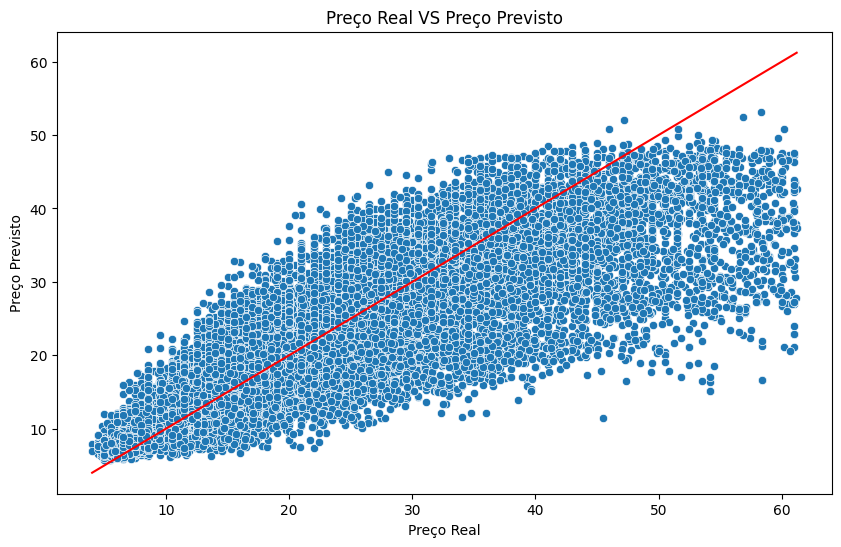

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,6))
sns.scatterplot(x=teste_y, y=predicao_y)
plt.plot([min(teste_y), max(teste_y)], [min(teste_y), max(teste_y)],
         color='red')
plt.xlabel("Preço Real")
plt.ylabel("Preço Previsto")
plt.title("Preço Real VS Preço Previsto")
plt.show()

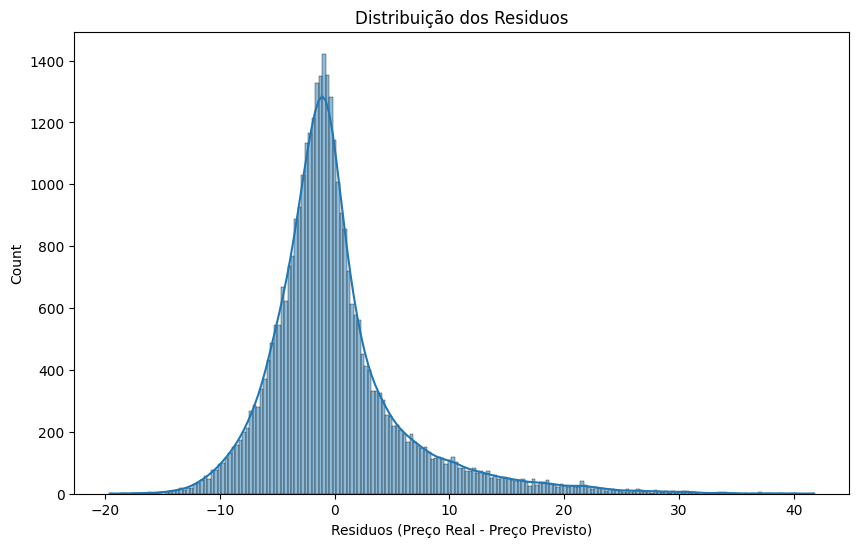

In [ ]:

plt.figure(figsize=(10,6))
sns.histplot(teste_y - predicao_y, kde=True)
plt.xlabel("Residuos (Preço Real - Preço Previsto)")
plt.title("Distribuição dos Residuos")
plt.show()

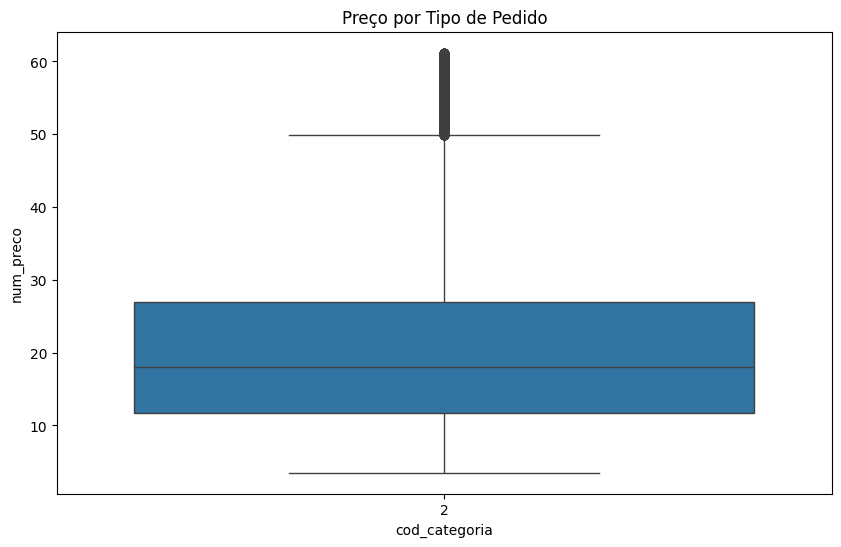

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='cod_categoria', y='num_preco', data=df)
plt.title("Preço por Tipo de Pedido")
plt.show()

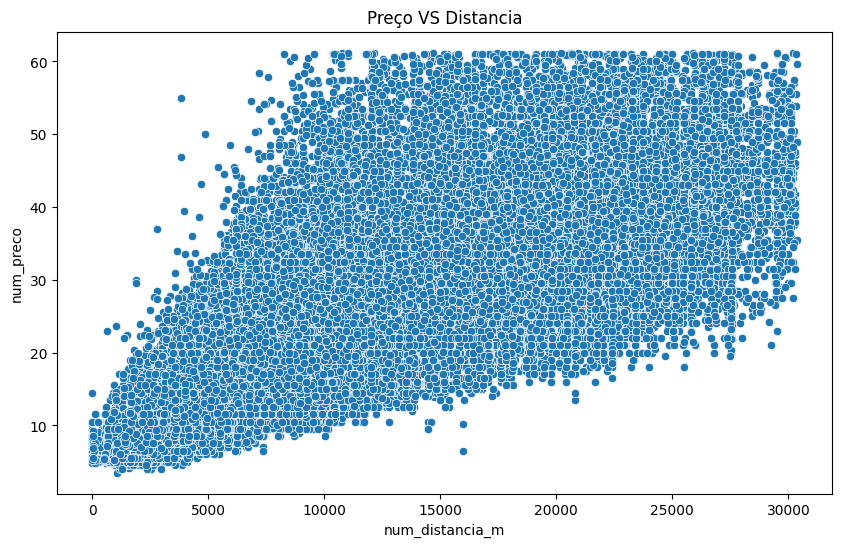

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_distancia_m', y='num_preco', data=df)
plt.title("Preço VS Distancia")
plt.show()

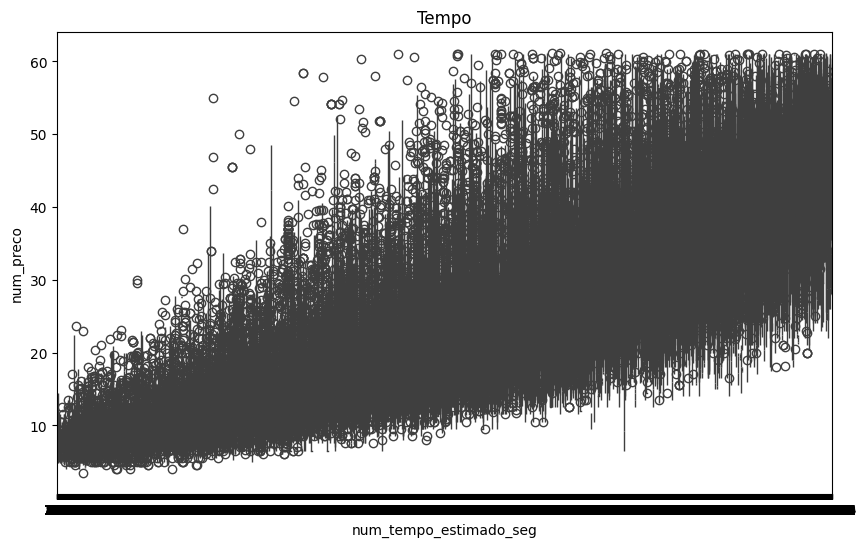

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='num_tempo_estimado_seg', y='num_preco', data=df)
plt.title("Tempo")
plt.show()

In [ ]:
def preverPreco(distancia, tempo_corrida_seg):
    novo_dado = pd.DataFrame(columns=treino_x.columns)

    novo_dado.loc[0, 'num_distancia_m'] = distancia
    novo_dado.loc[0, 'num_tempo_estimado_seg_1'] = tempo_corrida_seg

    return modelo.predict(novo_dado)[0]

horario = 1305.8
distancia = 2500

preco_previsto = preverPreco(distancia, horario)

print("\nEXEMPLO DE PREDIÇÃO:\n")
print(f"Distância: {distancia}")
print(f"Tempo de corrida: {horario}")
print(f"VALOR PREVISTO R$: {preco_previsto:3.2f}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- num_tempo_estimado_seg_1
